In [2]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import bandits as bd
import matplotlib.pyplot as plt

/root/.local/lib/python3.6/site-packages/Theano-1.0.1-py3.6.egg/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
cd bandits

/workspace/media/sam/210fe4c4-1b22-4bf7-acd3-e23cbed271e9/home/sam/multi-arm-bandit/bandits/bandits


In [6]:
from agent import Agent, BetaAgent

In [7]:
from bandit import BernoulliBandit, BinomialBandit
from policy import GreedyPolicy, EpsilonGreedyPolicy, UCBPolicy
from environment import Environment   

In [10]:
class BernoulliExample:                                                                                                             
     label = 'Bayesian Bandits - Bernoulli'                                                                                          
     bandit = BernoulliBandit(100, t=3*1000)                                                                                          
     agents = [                                                                                                                      
         Agent(bandit, EpsilonGreedyPolicy(0.1)),                                                                                    
         Agent(bandit, UCBPolicy(1)),                                                                                                
         BetaAgent(bandit, GreedyPolicy())                                                                                           
     ]                                 

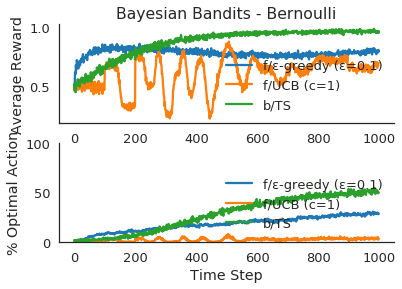

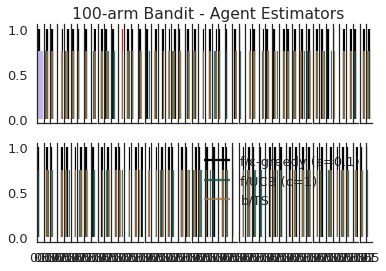

In [11]:
experiments = 500
trials = 1000
 
example = BernoulliExample()
     # example = BinomialExample()
 
env = Environment(example.bandit, example.agents, example.label)
scores, optimal = env.run(trials, experiments)
env.plot_results(scores, optimal)
env.plot_beliefs()
